In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.datasets import load_iris, load_diabetes
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [ ]:
#реализацию алгоритма k-ближайших соседей для классификации и регрессии.
class KNearestNeighbors:
    def __init__(self, n_neighbors=5, regression=False):
        self.n_neighbors = n_neighbors #Количество ближайших соседей для рассмотрения при предсказании.
        self.regression = regression #Флаг, указывающий, используется ли алгоритм для регрессии (True) или классификации (False).

    def fit(self, X_train, y_train): #X_train: Матрица признаков обучающих данных.  y_train: Вектор целевых значений для обучающих данных.
        self.X_train, self.y_train = X_train, y_train

    def _euclidean_distances(self, x_test_i): #расстояния между образцом тестовых данных и всеми образцами обучающих данных
        return np.sqrt(np.sum((self.X_train - x_test_i) ** 2, axis=1))

    def _make_prediction(self, x_test_i):
        distances = self._euclidean_distances(x_test_i)   # Вычисляет расстояния до всех соседей.
        k_nearest_indexes = np.argsort(distances)[:self.n_neighbors] #Находит индексы k ближайших соседей.
        targets = self.y_train[k_nearest_indexes]   # Извлекает целевые значения k ближайших соседей.

        return np.mean(targets) if self.regression else np.bincount(targets).argmax() #Вычисляет среднее целевых значений, если это задача регрессии, или вычисляет наиболее часто встречающееся целевое значение, если это задача классификации.

    def predict(self, X_test): #предсказания для каждого образца в тестовых данных,
        return np.array([self._make_prediction(x) for x in X_test])

In [ ]:
#Код для отрисовки графика

def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.values[:, feature_indexes]
    X_train_feature_columns = X_train[:, feature_indexes]
    clf.fit(X_train_feature_columns, y_train)

    plot_decision_regions(X=X_feature_columns, y=y.values, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

In [ ]:
#Загрузка датасетов
X1, y1 = load_iris(return_X_y=True, as_frame=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1.values, y1.values, random_state=0)
print(X1, y1, sep='\n')

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [ ]:
#загрузка датасета
X2, y2 = load_diabetes(return_X_y=True, as_frame=True)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2.values, y2.values, random_state=0)
print(X2, y2, sep='\n')

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019907 -0.017646  
1  

In [ ]:
#создание классификатора
knn_clf = KNearestNeighbors()
knn_clf.fit(X1_train, y1_train) #обучение модели
knn_clf_pred_res = knn_clf.predict(X1_test)# предсказание
knn_clf_accuracy = accuracy_score(y1_test, knn_clf_pred_res)#оценки точности

print(f'KNN classifier accuracy: {knn_clf_accuracy:}')
print(knn_clf_pred_res)

KNN classifier accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [ ]:
knn_reg = KNearestNeighbors(regression=True)
knn_reg.fit(X2_train, y2_train)
knn_reg_pred_res = knn_reg.predict(X2_test)
knn_reg_r2 = r2_score(y2_test, knn_reg_pred_res)

print(f'KNN regressor R2 score: {knn_reg_r2}')
print(knn_reg_pred_res)

KNN regressor R2 score: 0.18912404854026388
[253.6 188.6 183.2 138.4 177.8 189.6 111.8 229.  178.  266.8 147.6 193.8
 136.4  55.6 297.4  73.6  97.2  83.8 130.8 214.4 173.6 115.2 167.4 101.
 186.8 175.6  97.2  75.  172.4 144.2 205.4  63.8 161.6 190.8 110.2 159.2
 199.4 141.2 121.4 140.8 155.6 173.8 140.6 175.6 134.2  84.6 110.4 127.2
 107.4 209.2 130.2  78.2 183.6 105.  227.4 160.4 155.  104.6 119.2 175.8
 159.8 141.6 150.4 100.2 279.2 128.4  91.2 269.2 183.2  88.4 118.  151.6
  74.8  97.8 126.2 140.4 127.4 223.6 236.6 191.2 111.6 219.8  69.6 169.4
  87.6  92.6 112.  145.8 117.  153.2 115.2  92.8  67.6 172.   92.4 106.6
 208.4 173.8 113.2 104.4 141.6 128.2 226.   87.  247.6 147.6 223.6 217.2
 149.   72.6 182. ]


sk KNN classifier accuracy: 0.9736842105263158
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


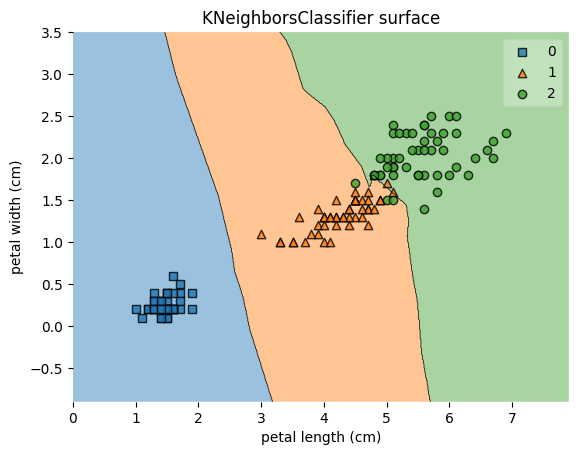

In [ ]:
sk_knn_clf = KNeighborsClassifier()
sk_knn_clf.fit(X1_train, y1_train)
sk_knn_clf_pred_res = sk_knn_clf.predict(X1_test)
sk_knn_clf_accuracy = accuracy_score(y1_test, sk_knn_clf_pred_res)

print(f'sk KNN classifier accuracy: {sk_knn_clf_accuracy:}')
print(sk_knn_clf_pred_res)
#визуализация границы принятия решений
feature_indexes = [2, 3]
title1 = 'KNeighborsClassifier surface'
decision_boundary_plot(X1, y1, X1_train, y1_train, sk_knn_clf, feature_indexes, title1)

In [ ]:
sk_knn_reg = KNeighborsRegressor()
sk_knn_reg.fit(X2_train, y2_train)
sk_knn_reg_pred_res = sk_knn_reg.predict(X2_test)
sk_knn_reg_r2 = r2_score(y2_test, sk_knn_reg_pred_res) #Вычисляется коэффициент определения R2 между фактическими целевыми значениями и предсказанными значениями

print(f'sk KNN regressor R2 score: {sk_knn_reg_r2}') #значение R2 для регрессора k-ближайших соседей.
print(sk_knn_reg_pred_res)

sk KNN regressor R2 score: 0.18912404854026388
[253.6 188.6 183.2 138.4 177.8 189.6 111.8 229.  178.  266.8 147.6 193.8
 136.4  55.6 297.4  73.6  97.2  83.8 130.8 214.4 173.6 115.2 167.4 101.
 186.8 175.6  97.2  75.  172.4 144.2 205.4  63.8 161.6 190.8 110.2 159.2
 199.4 141.2 121.4 140.8 155.6 173.8 140.6 175.6 134.2  84.6 110.4 127.2
 107.4 209.2 130.2  78.2 183.6 105.  227.4 160.4 155.  104.6 119.2 175.8
 159.8 141.6 150.4 100.2 279.2 128.4  91.2 269.2 183.2  88.4 118.  151.6
  74.8  97.8 126.2 140.4 127.4 223.6 236.6 191.2 111.6 219.8  69.6 169.4
  87.6  92.6 112.  145.8 117.  153.2 115.2  92.8  67.6 172.   92.4 106.6
 208.4 173.8 113.2 104.4 141.6 128.2 226.   87.  247.6 147.6 223.6 217.2
 149.   72.6 182. ]
